In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

In [2]:
def show_image(image, is_gray=True):
    plt.figure(figsize=(10, 10))
    if (is_gray):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()

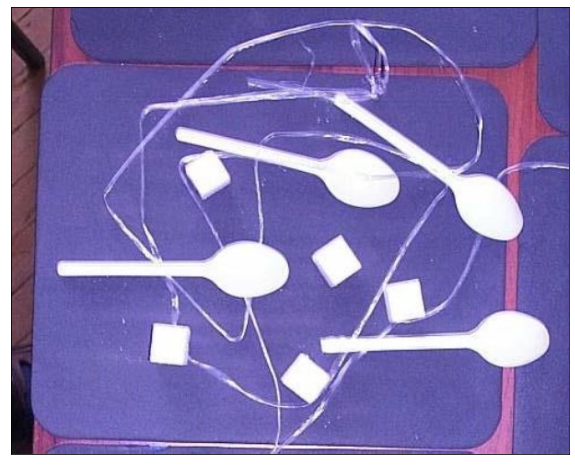

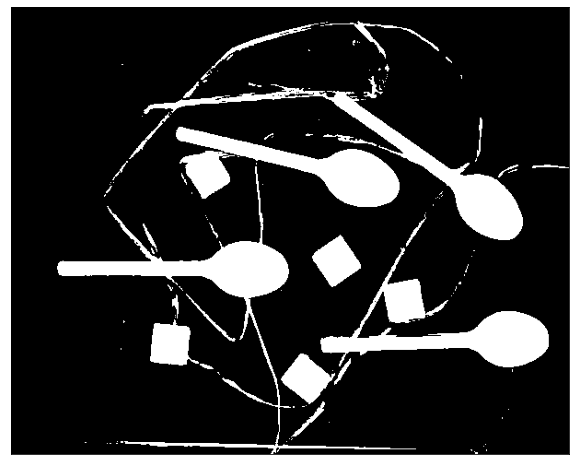

In [3]:
img = cv2.imread('img/spoons.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_image(img, False)
show_image(thresh)

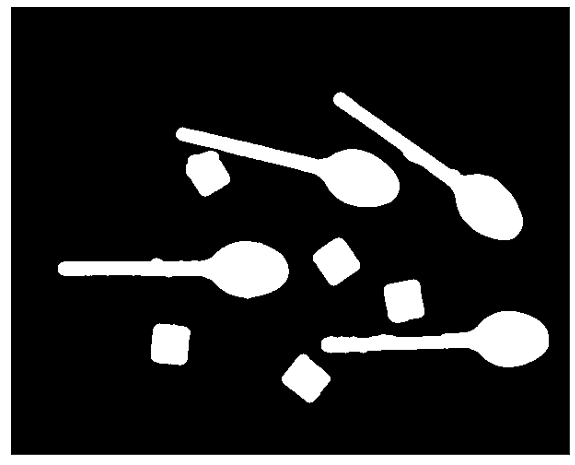

In [4]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)))
show_image(opening)

In [5]:
opening3 = np.zeros_like(img)
opening3[:,:,0] = opening
opening3[:,:,1] = opening
opening3[:,:,2] = opening
opening3eroded = cv2.erode(opening, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)), iterations=2)

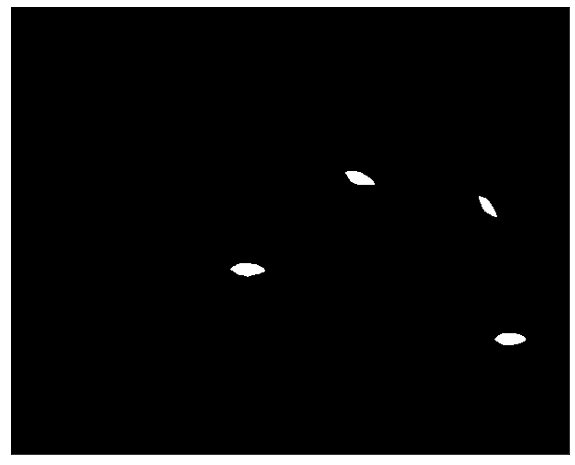

In [6]:
sure_spoons_markers = cv2.erode(opening, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)), iterations=4)
show_image(sure_spoons_markers)

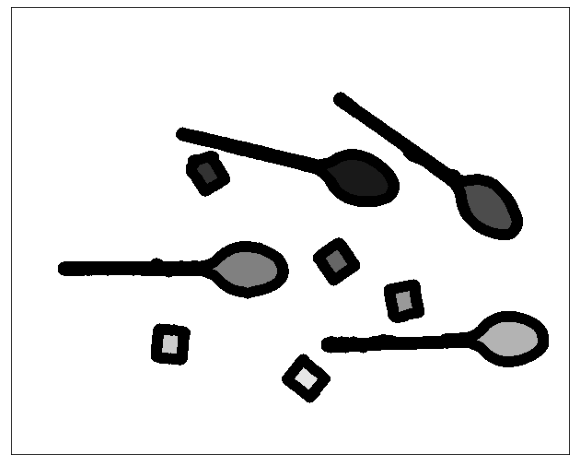

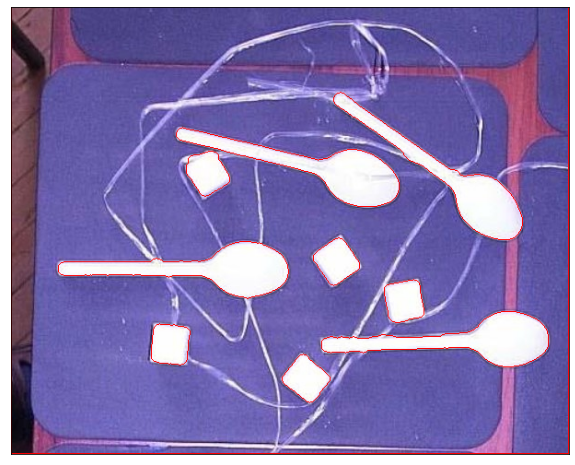

In [7]:
everything_count, everything_markers = cv2.connectedComponents(opening3eroded)
spoons_count, spoon_markers = cv2.connectedComponents(sure_spoons_markers)
everything_markers[opening == 0] = 10
show_image(everything_markers)
everything_markers = cv2.watershed(opening3, everything_markers)
img[everything_markers == -1] = (0, 0, 255)
show_image(img, False)

In [8]:
test = np.zeros_like(img)
test[everything_markers == -1] = (0,0,255)

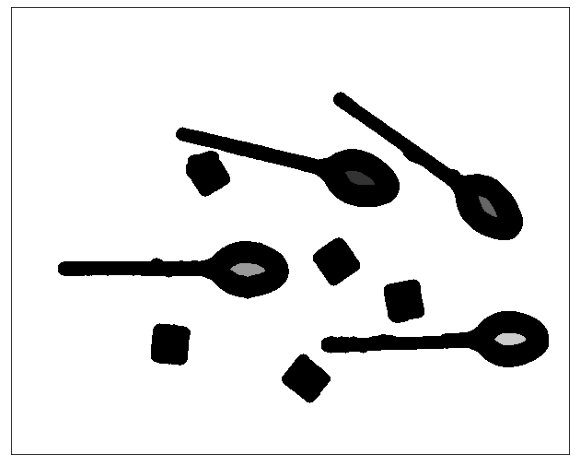

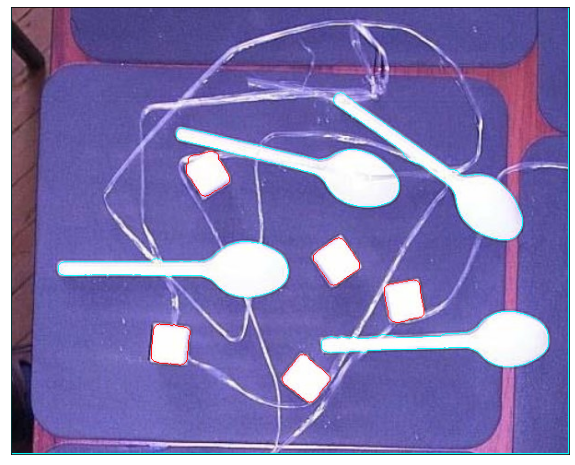

In [9]:
spoon_markers[opening == 0] = 5
show_image(spoon_markers)
spoon_markers = cv2.watershed(opening3, spoon_markers)
img[spoon_markers == -1] = (255, 255, 0)
show_image(img, False)

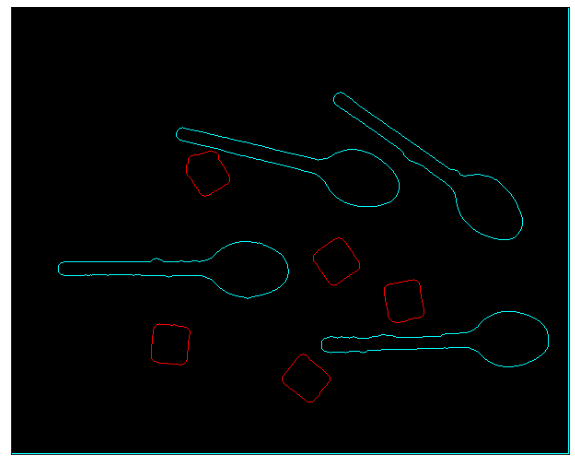

In [10]:
test[spoon_markers == -1] = (255, 255, 0)
show_image(test, False)

In [11]:
print("Кубиков сахара: ", everything_count - spoons_count)
print("Ложек: ", spoons_count - 1)

Кубиков сахара:  5
Ложек:  4
